In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = (9,6)

# Croston's method

In [3]:
df = pd.read_csv('data/intermittent_time_series.csv')

df.head()

,unique_id,ds,y
0,1,2023-01-01 00:00:00,43
1,1,2023-01-01 01:00:00,87
2,1,2023-01-01 02:00:00,89
3,1,2023-01-01 03:00:00,87
4,1,2023-01-01 04:00:00,73


In [4]:
# import models
from statsforecast import StatsForecast
from statsforecast.models import CrostonClassic

models = [CrostonClassic()]

# Initialise
sf = StatsForecast(df=df, models=models, freq='H', n_jobs=-1)

# cross validate
cv_df = sf.cross_validation(df=df, h=1, step_size=1, n_windows=50)

# reindex
cv_df.index = np.arange(50, 100, 1)



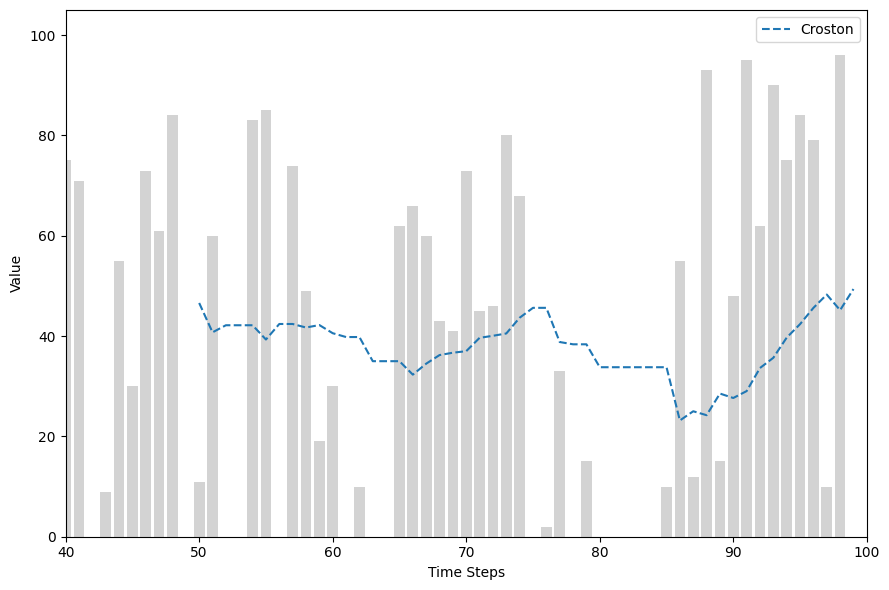

In [6]:
fig, ax = plt.subplots()

ax.bar(df.index, df.y, color='lightgray')
ax.plot(cv_df.index, cv_df['CrostonClassic'], ls='--', label='Croston')
ax.set_ylabel('Value')
ax.set_xlabel('Time Steps')
ax.legend(loc='best')
plt.xlim(40, 100)
plt.tight_layout()


In [7]:
cv_df.head()

,ds,cutoff,y,CrostonClassic
50,2023-01-03 02:00:00,2023-01-03 01:00:00,11.0,46.597469
51,2023-01-03 03:00:00,2023-01-03 02:00:00,60.0,40.745182
52,2023-01-03 04:00:00,2023-01-03 03:00:00,0.0,42.156780
53,2023-01-03 05:00:00,2023-01-03 04:00:00,0.0,42.156780
54,2023-01-03 06:00:00,2023-01-03 05:00:00,83.0,42.156780


## Optimized Croston's Method 

In [8]:
from statsforecast.models import CrostonOptimized

In [9]:
models = [CrostonOptimized()]

# Initialise
sf = StatsForecast(df=df, models=models, freq='H', n_jobs=-1)

# cross validate
cv_df = sf.cross_validation(df=df, h=1, step_size=1, n_windows=50)

# reindex
cv_df.index = np.arange(50, 100, 1)

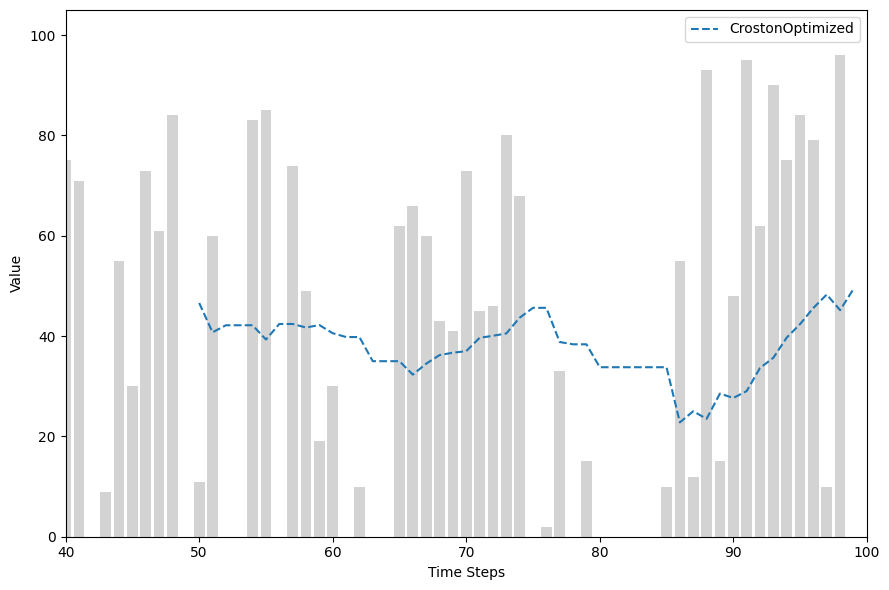

In [10]:
fig, ax = plt.subplots()

ax.bar(df.index, df.y, color='lightgray')
ax.plot(cv_df.index, cv_df['CrostonOptimized'], ls='--', label='CrostonOptimized')
ax.set_ylabel('Value')
ax.set_xlabel('Time Steps')
ax.legend(loc='best')
plt.xlim(40, 100)
plt.tight_layout()